<a href="https://colab.research.google.com/github/JaehwanKim00/class_ai4dl/blob/main/%EA%B9%80%EC%9E%AC%ED%99%98_%EB%8F%84%EC%84%9C%EA%B4%80_EDA_%EB%AC%B8%ED%95%99%EC%A0%9C%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
!pip install konlpy
from konlpy.tag import Komoran  # Komoran 형태소 분석기를 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

#MZ 세대 연령별 성별 작가 대출합계 순위

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_gender_문학제외.csv',skiprows=14,encoding='cp949')

In [ ]:
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수
0,1,"물고기는 존재하지 않는다 :상실, 사랑 그리고 숨어 있는 삶의 질서에 관한 이야기",룰루 밀러 지음 ;정지인 옮김,곰출판,2021,NaN,9.790000e+12,3400,490.990,"7,567"
1,2,어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화,글: 오은영 ;그림: 차상미,김영사,2020,NaN,9.790000e+12,13590,598.100,"6,111"
2,3,공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가,지은이: 마이클 샌델 ;함규진 옮김,미래엔,2020,NaN,9.790000e+12,3300,332.600,"5,837"
3,4,돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것,지은이: 김승호,Snowfox(스노우폭스북스),2020,NaN,9.790000e+12,3320,327.040,"5,741"
4,5,타이탄의 도구들 :1만 시간의 법칙을 깬 거인들의 61가지 전략,팀 페리스 지음 ;정지현 옮김,Tornado(토네이도),2017,NaN,9.790000e+12,3190,325.211,"5,557"


In [ ]:
df['ISBN부가기호'].head()

0     3400
1    13590
2     3300
3     3320
4     3190
Name: ISBN부가기호, dtype: int64

In [ ]:
df = pd.DataFrame([['77777', 'Kim', 'H'],
                             [None, 'Lee', 'W'],
                             ['55555', 'Jeong', 'S']], columns = ['ISBN부가기호', 'name', 'class'])

In [ ]:
# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 결과 확인
print(df)

  ISBN부가기호   name class
1     None    Lee     W
2    55555  Jeong     S


            저자  대출건수 합계
0       글: 오은영    15376
1       송희구 지음    13430
2       채사장 지음    12386
3  지은이: 마이클 샌델    10350
4     팀 페리스 지음     9544
5   엠제이 드마코 지음     8557
6       유현준 지음     8260
7       오건영 지음     7789
8     지은이: 유시민     7720
9     룰루 밀러 지음     7567
        저자  대출건수 합계
0    룰루 밀러     7567
1   마이클 샌델    10350
2      송희구    13430
3  엠제이 드마코     8557
4      오건영     7789
5      오은영    15376
6      유시민     7720
7      유현준     8260
8      채사장    12386
9    팀 페리스     9544


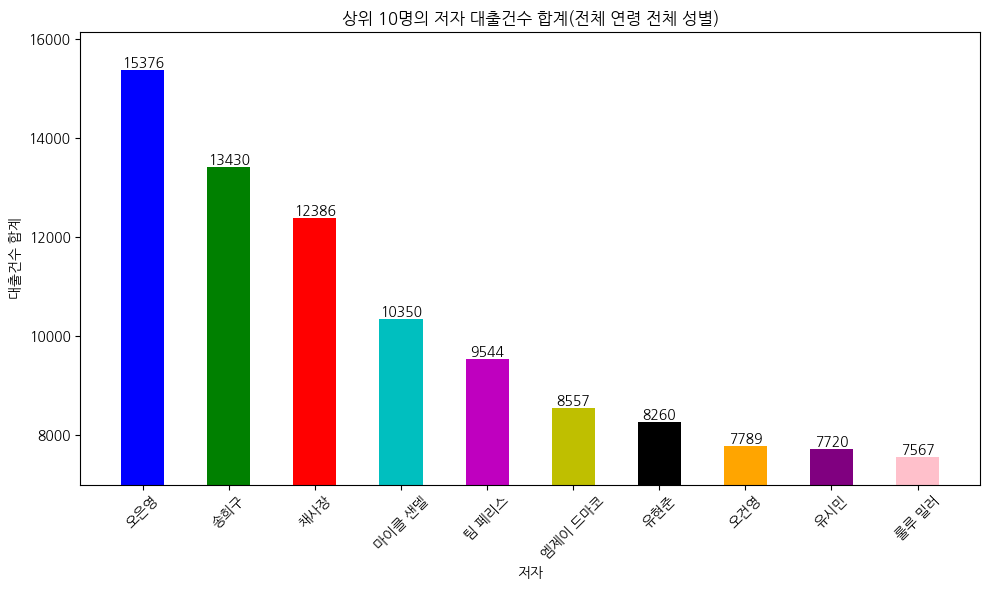

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_gender_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]
# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 결과 확인
#print(df)

import pandas as pd


# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거


import pandas as pd


# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

print(result_df)

import pandas as pd
from konlpy.tag import Okt

# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)



# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 전체 성별)')
plt.xticks(rotation=45)
plt.tight_layout()


# y축 범위 설정
plt.ylim(7000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)


plt.show()



In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

1059962
100979
9.526662276572178


         저자  대출건수 합계
0       강환국     2715
1  로버트 기요사키     2698
2    마이클 샌델     3034
3       송희구     3223
4   엠제이 드마코     2886
5       오건영     2901
6    유발 하라리     2795
7       유현준     2883
8       채사장     4218
9     팀 페리스     2869


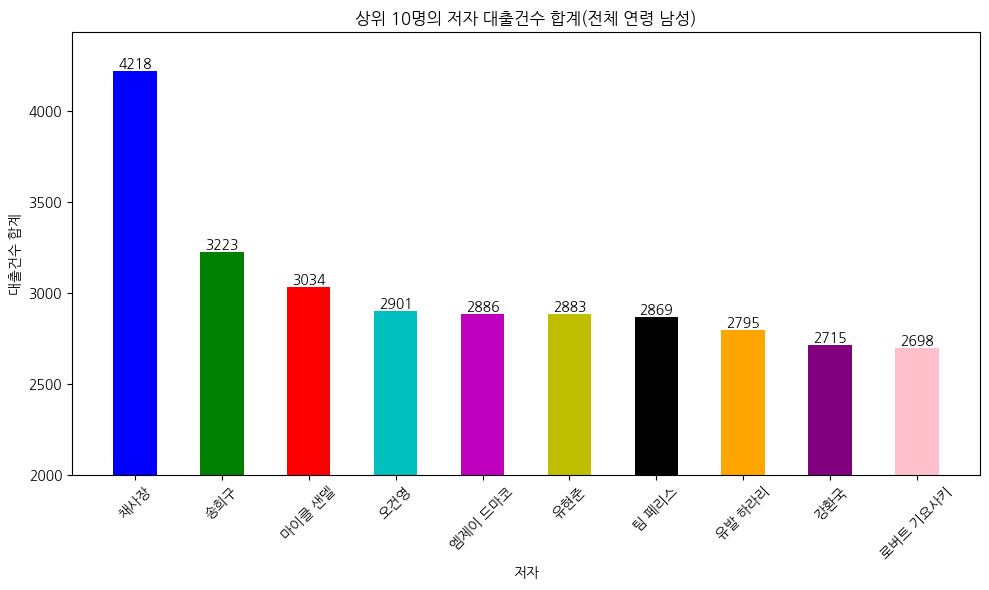

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_male_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']


import pandas as pd
from konlpy.tag import Okt


# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)



# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

327195
30222
9.236693714757255


        저자  대출건수 합계
0    룰루 밀러     6348
1   마이클 샌델     6838
2      송희구     9851
3  엠제이 드마코     5376
4      오은영    12864
5      유시민     5314
6      유현준     5000
7      조원재     4682
8      채사장     7430
9    팀 페리스     5945


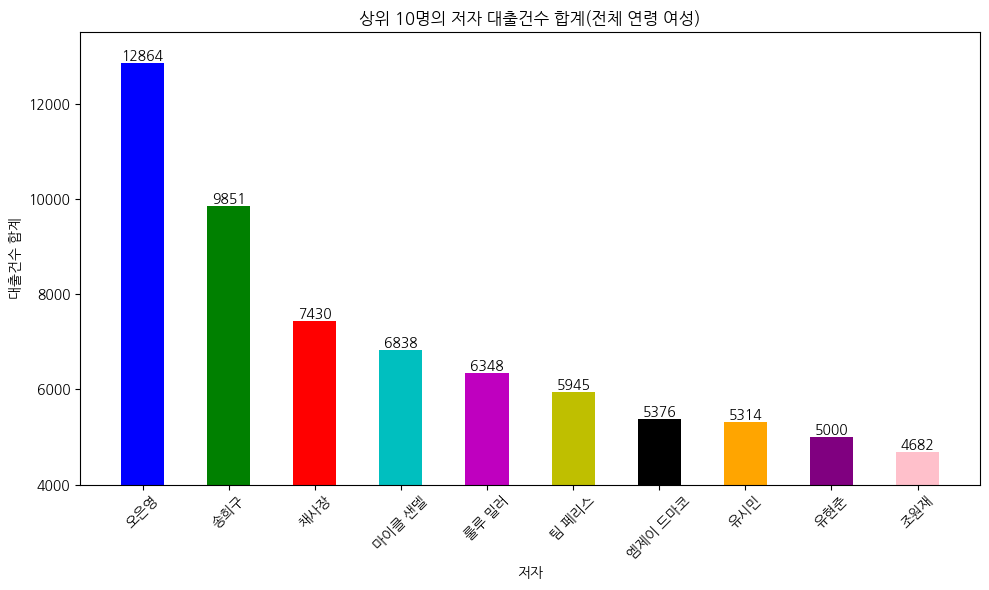

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_female_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt



# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)



# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(4000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

732351
69648
9.510193882441616


        저자  대출건수 합계
0   마이클 샌델     2557
1      채사장     2419
2  리처드 도킨스     1804
3     장 지러     1607
4  기시미 이치로     1543
5      김지혜     1438
6      정재승     1375
7      유현준     1342
8      조경규     1278
9  사마키 다케오     1203


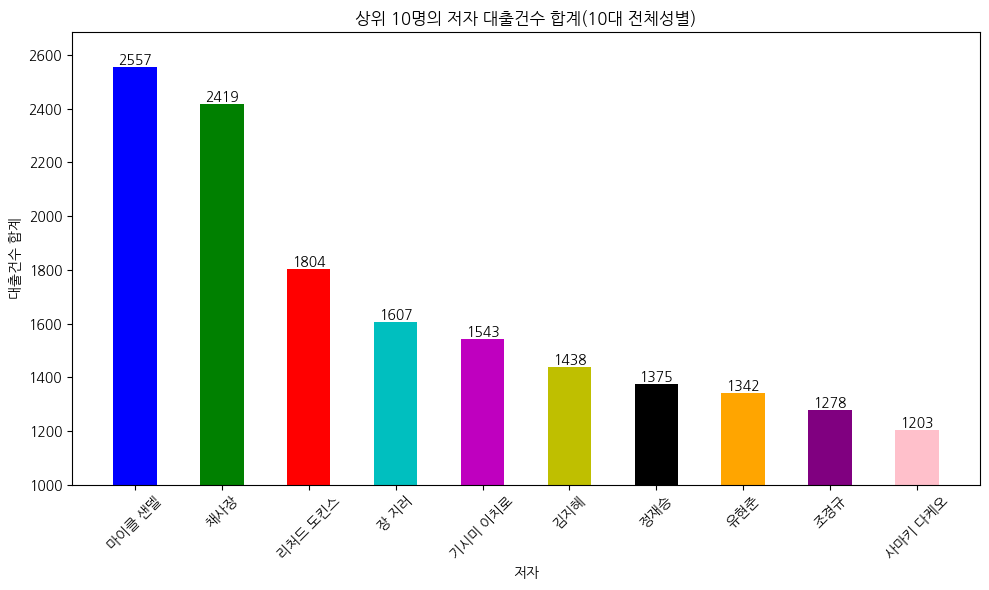

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_gender_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 수정된 데이터프레임 생성
cleaned_result_df = result_df.copy()

# 결과 확인
print(cleaned_result_df)


# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

171089
16566
9.682679774854023


        저자  대출건수 합계
0      허영만      925
1      채사장      868
2   마이클 샌델      767
3    굽시니스트      744
4  리처드 도킨스      594
5      조경규      586
6      정재승      579
7      이희건      566
8      유현준      561
9    랜들 먼로      514


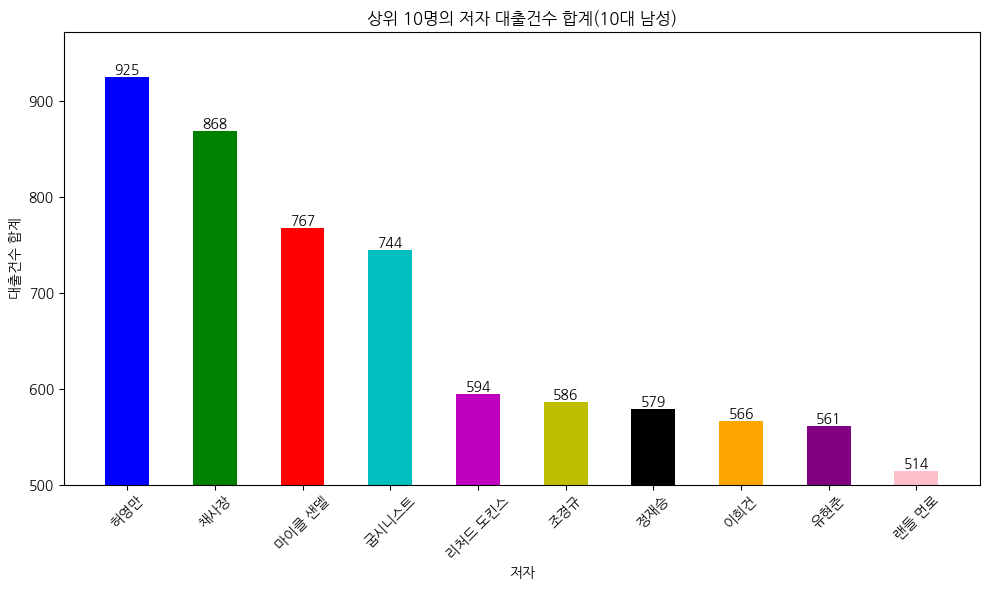

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_male_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 수정된 데이터프레임 생성
cleaned_result_df = result_df.copy()

# 결과 확인
print(cleaned_result_df)


# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(500, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

63629
6704
10.536076317402442


            저자  대출건수 합계
0  지은이: 마이클 샌델     1677
1       채사장 지음     1437
2   리처드 도킨스 지음     1059
3       김지혜 지음     1053
4     장 지글러 지음     1021
5      기시미 이치로      986
6       정재승 지음      684
7       유현준 지음      677
8  지은이: 유발 하라리      659
9  지은이: 레이첼 카슨      608
        저자  대출건수 합계
0  기시미 이치로      986
1      김지혜     1053
2   레이첼 카슨      608
3  리처드 도킨스     1059
4   마이클 샌델     1677
5   유발 하라리      659
6      유현준      677
7     장 지러     1021
8      정재승      684
9      채사장     1437


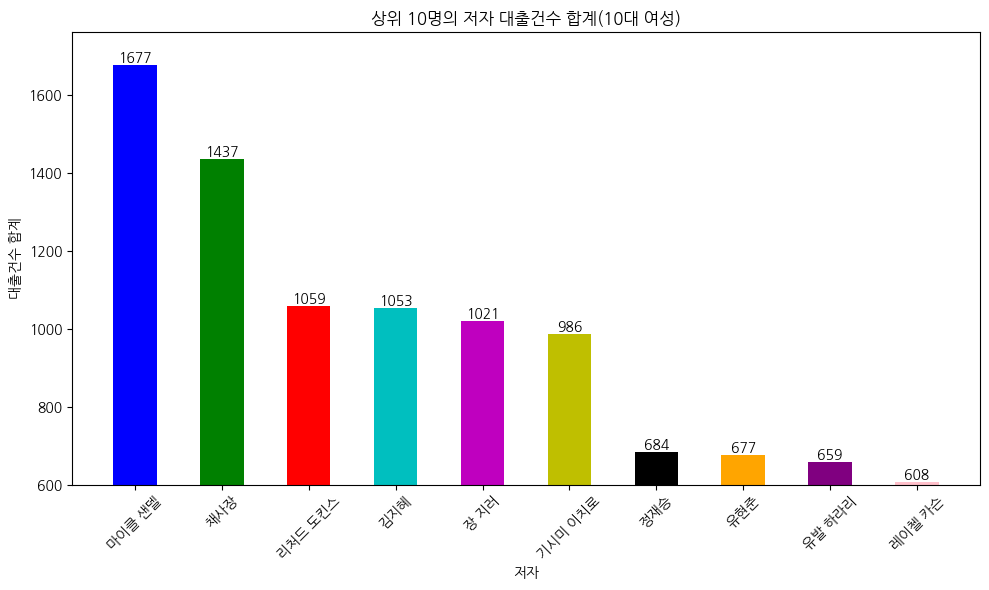

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_female_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

print(result_df)

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)



# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(600, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

99149
9861
9.945637374053193


        저자  대출건수 합계
0      김난도     2848
1   데일 카네기     3142
2    룰루 밀러     3703
3   마이클 샌델     4852
4  엠제이 드마코     3117
5   유발 하라리     3162
6      유시민     3063
7      유현준     3612
8      채사장     6925
9    팀 페리스     3237


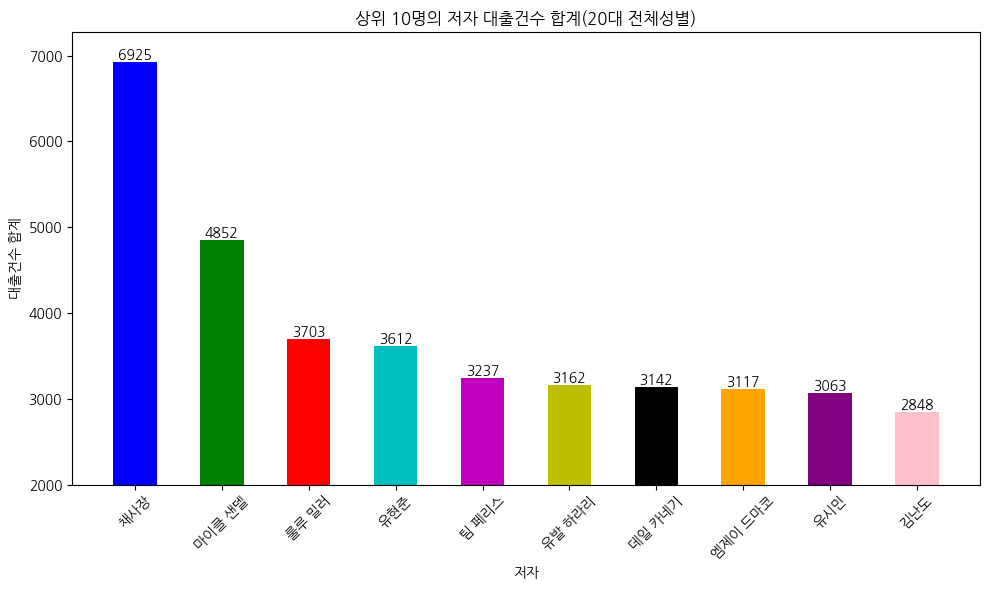

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_gender_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

392162
37661
9.603429195077544


          저자  대출건수 합계
0     데일 카네기     1019
1   로버트 기요사키      934
2     마이클 샌델     1451
3    엠제이 드마코     1135
4     유발 하라리     1179
5        유현준     1235
6  재레드 다이아몬드      853
7        채사장     2105
8      팀 페리스     1006
9      피터 린치      865


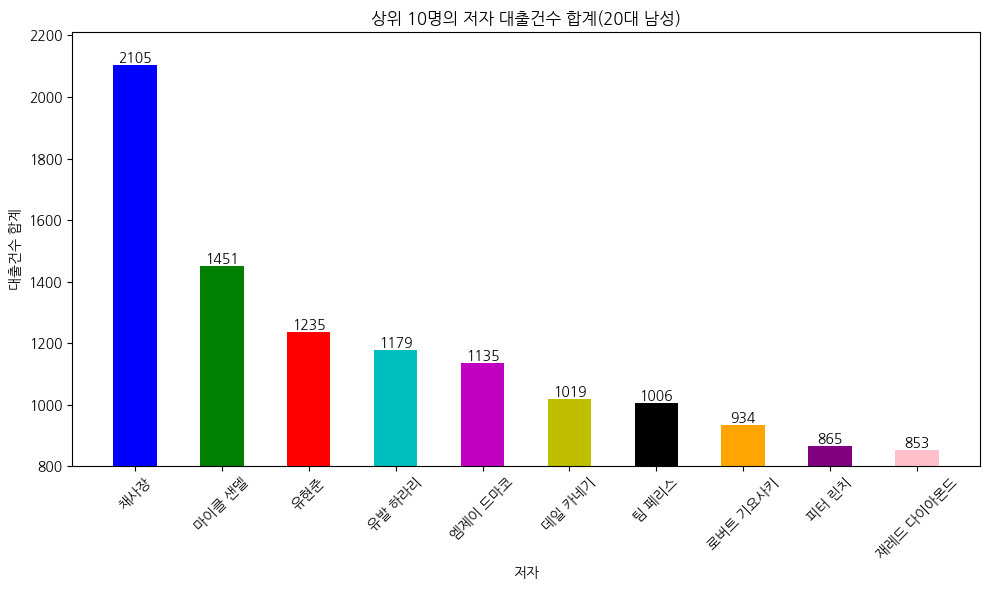

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_male_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(800, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

        저자  대출건수 합계
0  기시미 이치로     1932
1      김난도     1988
2   데일 카네기     1850
3    룰루 밀러     3201
4   마이클 샌델     3238
5  브라이언 헤어     1952
6      유시민     2372
7      유현준     2197
8      채사장     4525
9    팀 페리스     2175


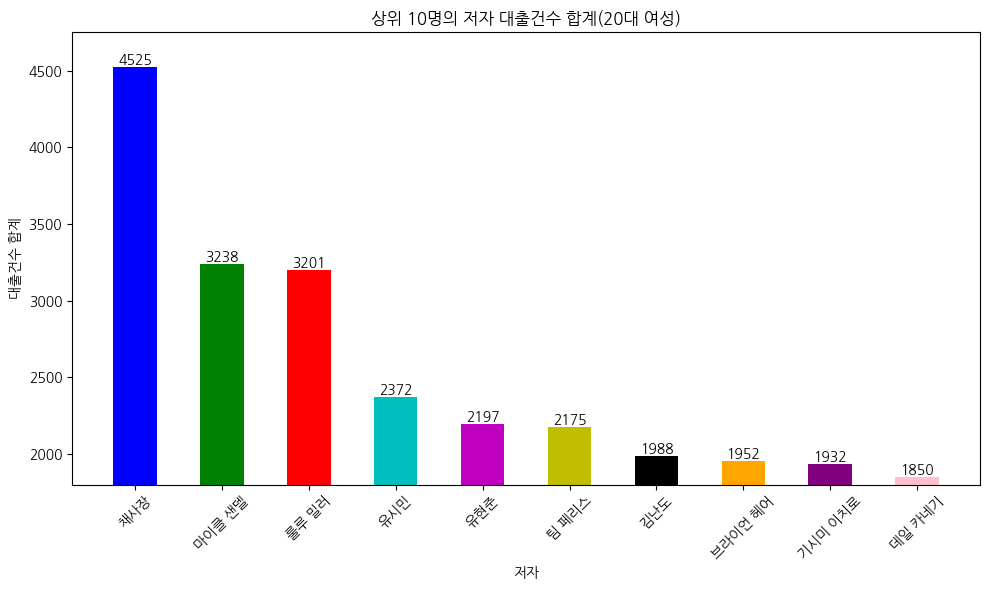

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_female_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1800, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       강환국     3575
1       김승호     4295
2  로버트 기요사키     4456
3       송희구    10380
4   엠제이 드마코     5035
5       오건영     5483
6       오은영    13398
7       이임숙     4265
8      켈리 최     4251
9     팀 페리스     5270


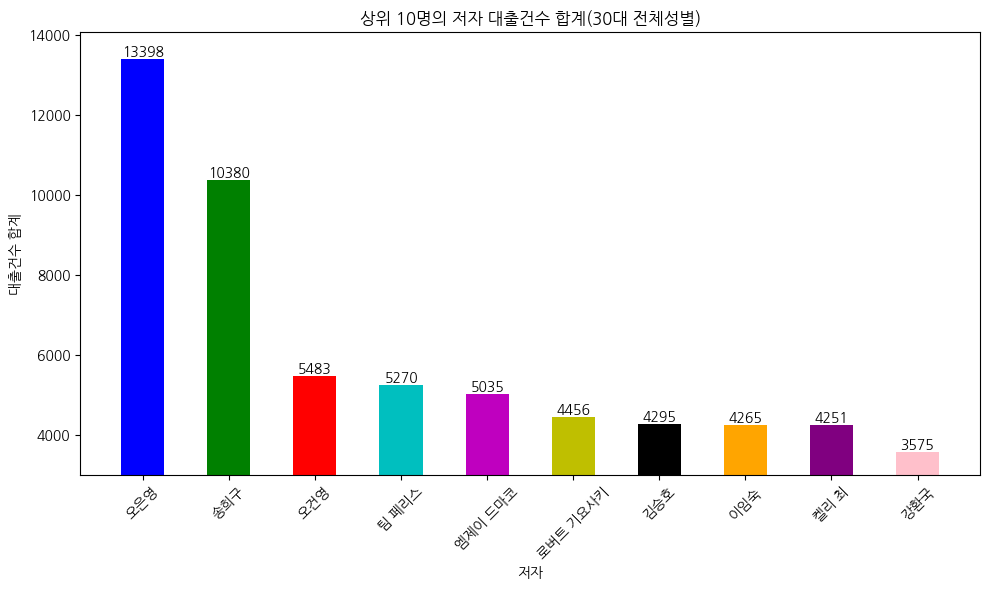

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_gender_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(3000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

628304
60408
9.614454149583642


         저자  대출건수 합계
0       강환국     2000
1       김승호     1273
2  로버트 기요사키     1603
3       송희구     2392
4   엠제이 드마코     1560
5       오건영     2004
6       오은영     1683
7     팀 페리스     1660
8     피터 린치     1375
9       홍춘욱     1645


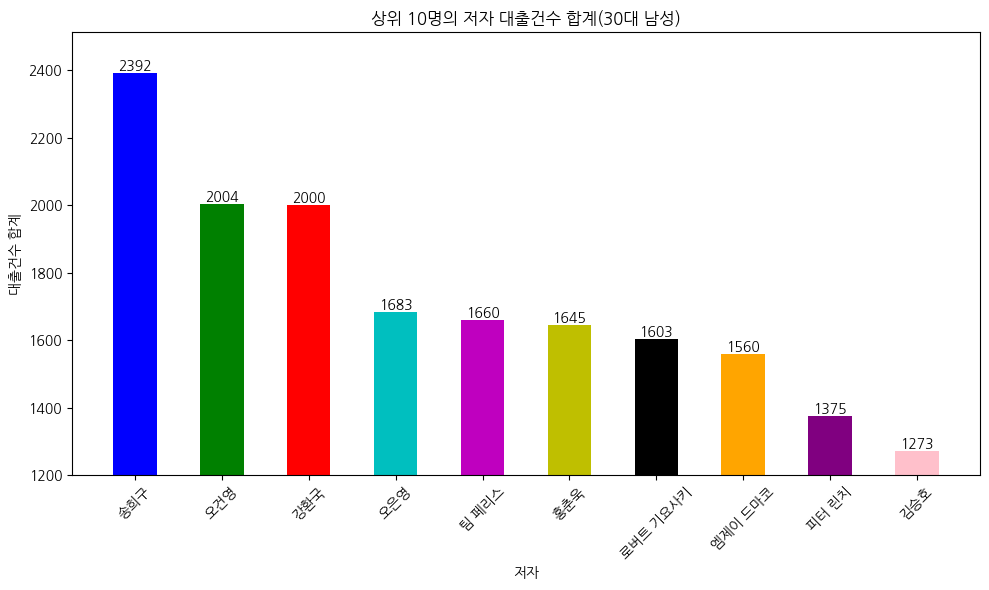

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_male_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1200, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

180893
17195
9.505619344032107


        저자  대출건수 합계
0      김승호     2912
1      송희구     7769
2  엠제이 드마코     3362
3      오건영     3351
4      오은영    11679
5      이신애     2874
6      이은경     2977
7      이임숙     3712
8     켈리 최     3288
9    팀 페리스     3606


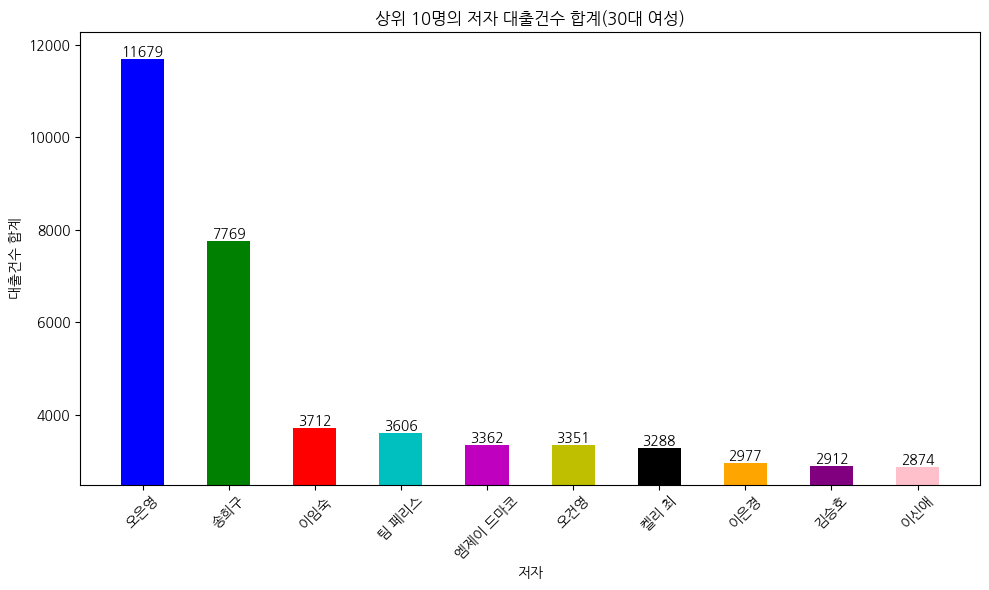

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_female_문학제외.csv',skiprows=14,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2500, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

460178
45530
9.893997540082317


#비MZ 작가순위

       저자  대출건수 합계
0     김지수     4619
1      법륜     4584
2     송희구     7006
3     오건영     5320
4  유발 하라리     6104
5     유시민     9682
6     유홍준     7267
7     정선근     5205
8     허영만     5368
9     홍춘욱     4886


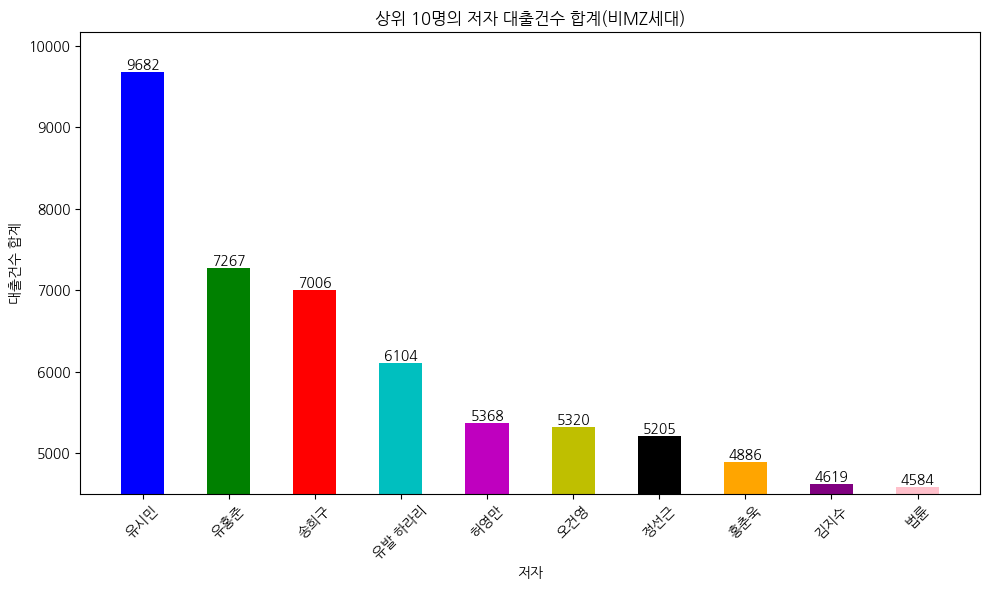

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_notMZ_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(비MZ세대)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(4500, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

737305
60041
8.143305687605535


In [ ]:
import pandas as pd
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 수정된 데이터프레임 생성
cleaned_result_df = result_df.copy()

# 결과 확인
print(cleaned_result_df)


       저자  대출건수 합계
0     유시민     9682
1     유홍준     7267
2     송희구     7006
3  유발 하라리     6104
4     허영만     5368
5     오건영     5320
6     정선근     5205
7     홍춘욱     4886
8     김지수     4619
9      법륜     4584


#분기별 MZ 작가 순위

         저자  대출건수 합계
0  로버트 기요사키     1443
1    마이클 샌델     1837
2       송희구     2168
3   엠제이 드마코     1396
4       오은영     2516
5       유시민     1379
6       유현준     1749
7       채사장     2327
8     팀 페리스     1591
9       홍춘욱     1393


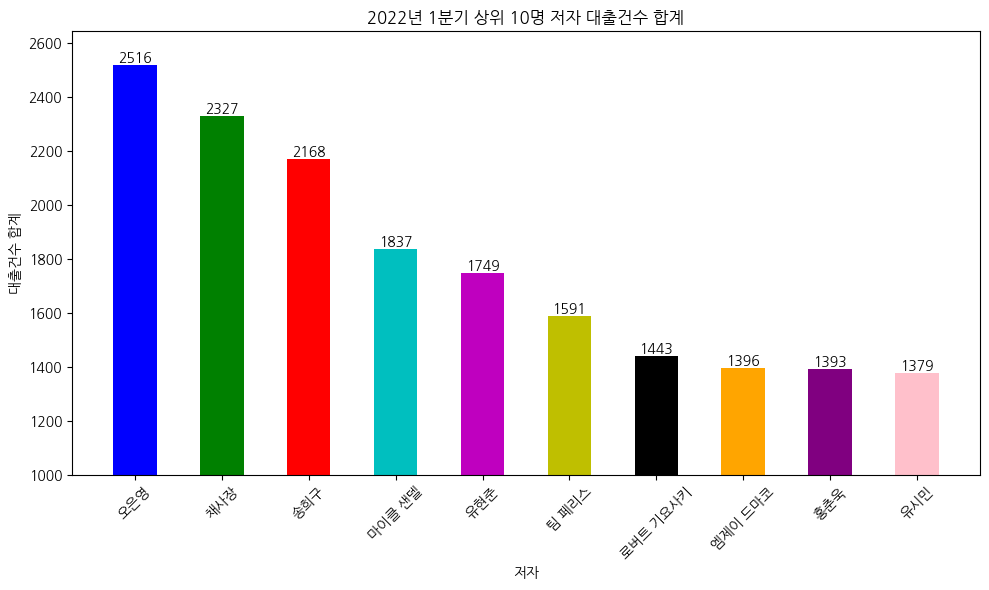

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2022_0331_first_문학제외.csv',skiprows=14,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 1분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

        저자  대출건수 합계
0    룰루 밀러     1325
1   마이클 샌델     1634
2      송희구     2553
3  엠제이 드마코     1329
4      오은영     2800
5   유발 하라리     1153
6      유현준     1272
7      채사장     1465
8     켈리 최     1197
9    팀 페리스     1436


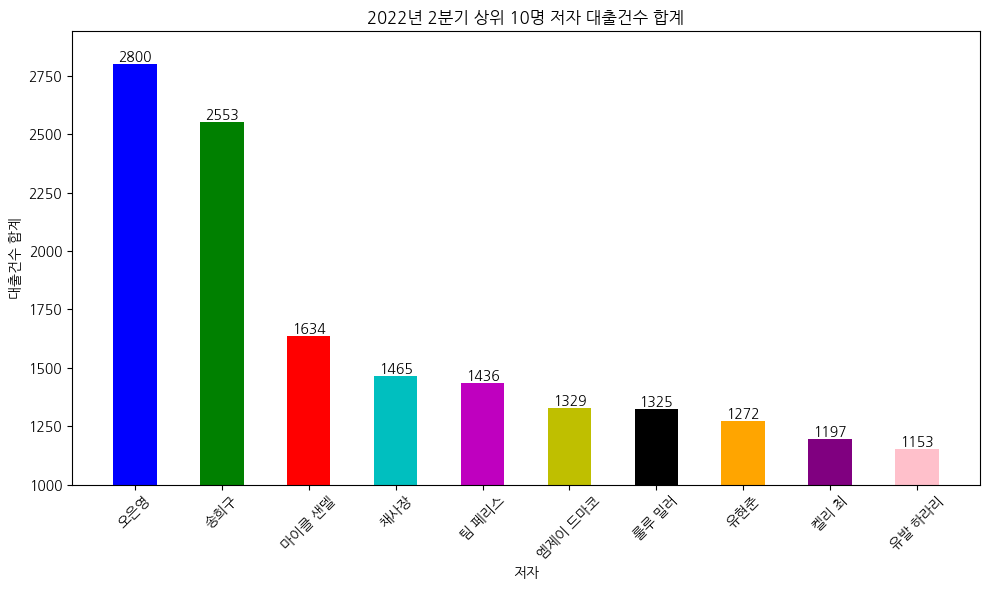

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0401_2022_0630_second_문학제외.csv',skiprows=14,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 2분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0  로버트 기요사키     1393
1     룰루 밀러     1439
2    마이클 샌델     1850
3       송희구     2578
4   엠제이 드마코     1543
5       오건영     1685
6       오은영     3109
7       유시민     1489
8       채사장     1589
9     팀 페리스     1632


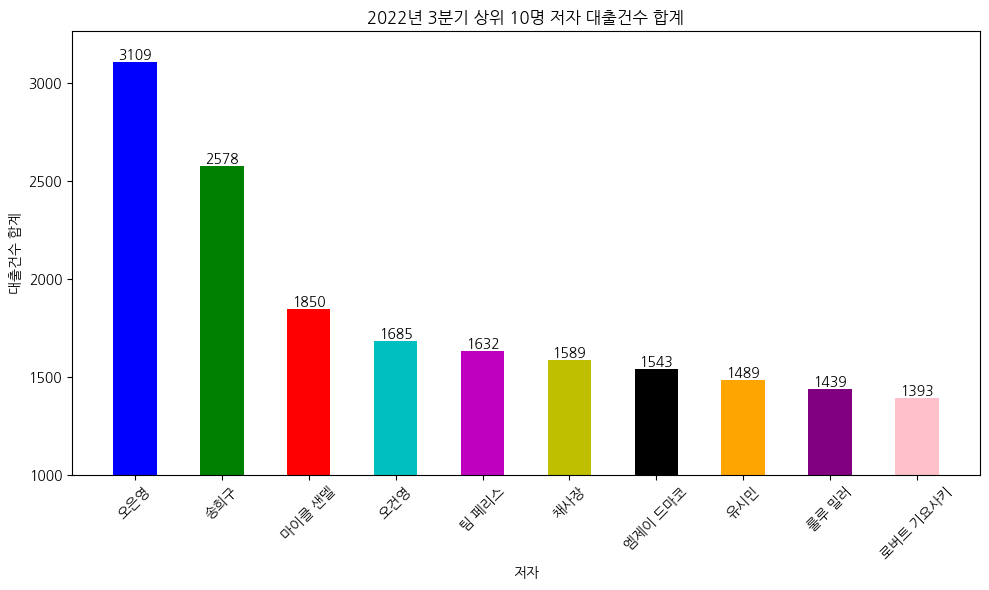

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0701_2022_0930_third_문학제외.csv',skiprows=14,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 3분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

        저자  대출건수 합계
0    룰루 밀러     1500
1   마이클 샌델     1686
2      송희구     2356
3  엠제이 드마코     1460
4      오건영     1524
5      오은영     2850
6      유시민     1472
7      유현준     1269
8      채사장     1765
9    팀 페리스     1565


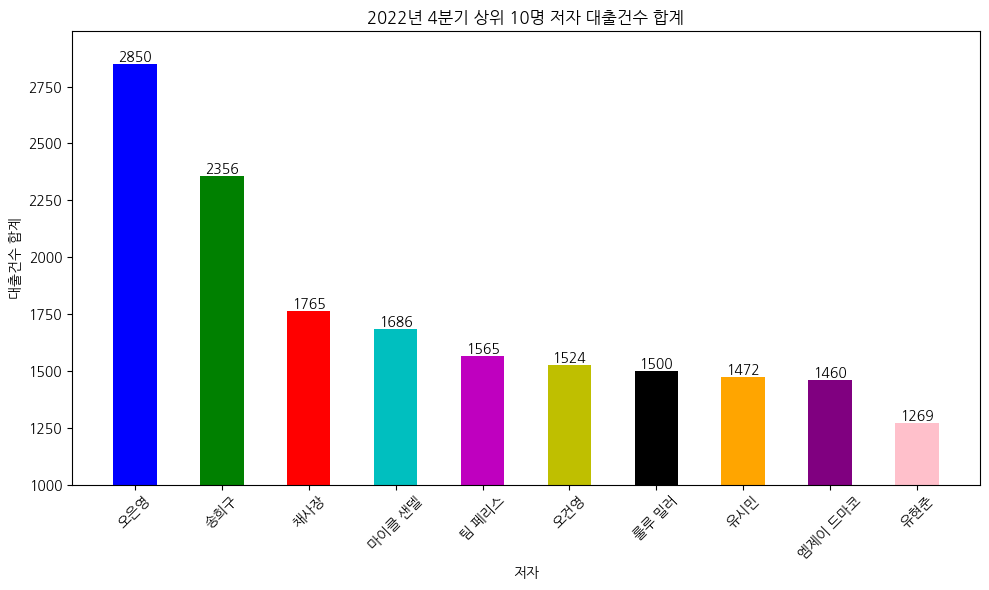

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_1001_2022_1231_fourth_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 4분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

        저자  대출건수 합계
0    룰루 밀러     1362
1   마이클 샌델     1752
2      송희구     1811
3  엠제이 드마코     1561
4      오은영     2246
5   유발 하라리     1302
6      유시민     1349
7      유현준     1464
8      채사장     3172
9    팀 페리스     1415


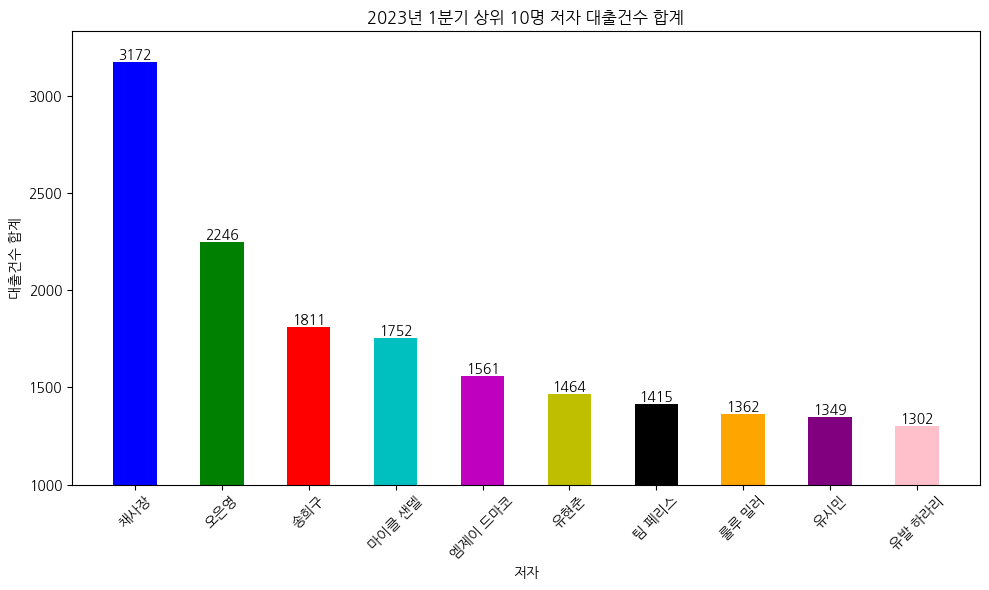

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2023_0101_2023_0331_first_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2023년 1분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

        저자  대출건수 합계
0      김승호     1305
1    룰루 밀러     1494
2   마이클 샌델     1730
3      송희구     2136
4  엠제이 드마코     1255
5      오은영     1986
6      유현준     1144
7       자청     1063
8      채사장     2059
9    팀 페리스     1578


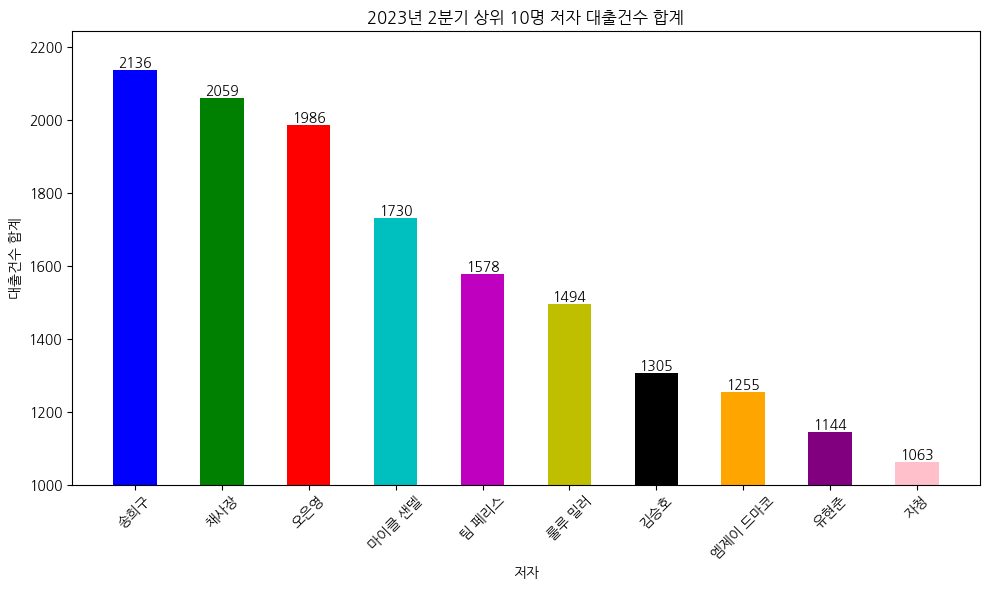

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_문학제외/"
df =pd.read_csv(dpath+'BestLoanList_2023_0401_2023_0630_second_문학제외.csv',skiprows=14,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2023년 2분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()